In [ ]:
#[코드 5-1] 전처리에 필요한 라이브러리 설치코드
##텍스트 전처리 설치코드
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,449 kB]
Get:14 http://archive.ubuntu.com/ubunt

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Package 'python-dev' has no installation candidate


In [ ]:
#[코드 5-2] 실습자료 불러오기 코드
import pandas as pd
data = pd.read_excel("data.xlsx")
contents = data["REVIEW"]
contents

,REVIEW
0,"예전엔 잘 됐는데, 몇주 전부터 뛰는 중간에 자꾸 어플이 멈춥니다. 강제 종료 후 ..."
1,"진짜 이때동안 해온 기록들이 아까워서 참고 쓰는거지, 틈만나면 강제로 로그아웃되고 ..."
2,"예전엔 잘 됐는데, 몇주 전부터 뛰는 중간에 자꾸 어플이 멈춥니다. 강제 종료 후 ..."
3,"진짜 이때동안 해온 기록들이 아까워서 참고 쓰는거지, 틈만나면 강제로 로그아웃되고 ..."
4,무한로딩 다음 화면으로 안넘어감 재부팅하면 기록 날라가있음 주기적으로 무한로딩 걸림...
...,...
7929,도전욕구 자극..최고!
7930,업데이트 후 뛰었는데 기록이 동기화대기중만 되고 인터넷에적힌방법으로 해도처리가 안되네요
7931,약간의 오류만 빼면..
7932,다른 런닝 앱이랑 차이점이 그닥...


In [ ]:
#[코드 5-3] 실습자료 전처리 코드
from konlpy.tag import Okt
import pandas as pd

t = Okt()
pos = lambda d: ['/'.join(p[:-1]) for p in t.pos(d, stem=True, norm=True) if ((p[1]=='Noun') |(p[1]=='Verb')|(p[1]=='Adjetive') )]
texts_ko = []
for doc in contents:
  a = pos(doc)
  texts_ko.append(a)
print(texts_ko)

[['예전', '자다', '돼다', '주', '전', '뛰다', '중간', '자꾸', '어플', '멈추다', '강제', '종료', '후', '다시', '켜다', '중간', '일정', '거리', '시간', '건너', '뛰다', '채', '켜다', '이', '계속', '반복', '돼다', '제대로', '되다', '기록', '측정', '데이터', '와이파이', '기능', '정상', '켜', '놓다', '매일', '이르다', '다른', '어플', '갈아타다', '하나', '고민', '되다'], ['진짜', '때', '동안', '해오다', '기록', '참고', '쓰다', '틈', '만나다', '강제', '로그아웃', '되다', '로그인', '하다', '무한', '로딩', '뜨다', '뛰다', '잠시', '숨좀', '고르다', '정지', '하다', '다시', '재개', '버튼', '누르다', '멈추다', '강제', '다시', '정지', '되다', '버리다', '장난', '하다', '어플', '업데이트', '하다', '제대로', '하다', '진짜', '러닝', '하다', '증상', '땜', '개선', '좀', '해주다', '사용', '한지', '좀'], ['예전', '자다', '돼다', '주', '전', '뛰다', '중간', '자꾸', '어플', '멈추다', '강제', '종료', '후', '다시', '켜다', '중간', '일정', '거리', '시간', '건너', '뛰다', '채', '켜다', '이', '계속', '반복', '돼다', '제대로', '되다', '기록', '측정', '데이터', '와이파이', '기능', '정상', '켜', '놓다', '매일', '이르다', '다른', '어플', '갈아타다', '하나', '고민', '되다'], ['진짜', '때', '동안', '해오다', '기록', '참고', '쓰다', '틈', '만나다', '강제', '로그아웃', '되다', '로그인', '하다', '무한', '로딩', '뜨다', '뛰다', '잠시', '숨좀', '고르다', '정지'

In [ ]:
#[코드 5-4] 실습자료 정형화 코드
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

quantify = TransactionEncoder()
te_ary = quantify.fit(texts_ko).transform(texts_ko)
te_ary_int = te_ary.astype(int)
df = pd.DataFrame(te_ary_int, columns=quantify.columns_)
df

,가게,가관,가기,가까이,가끔,가나,가능,가다,가다가,가도,...,흘러가다,흘리다,흠,흡연,흥,흥미,히,힘,힘내다,힘빠지다
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#[코드 5-5] 실습자료 정답변수 전처리 코드
import numpy as np
catagory = [
    (data['별점'] == 5) ,
    (data['별점'] == 1)]
choicelist = [1, 0]
df['result'] = np.select(catagory, choicelist)
df

,가게,가관,가기,가까이,가끔,가나,가능,가다,가다가,가도,...,흘리다,흠,흡연,흥,흥미,히,힘,힘내다,힘빠지다,result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#[코드 5-6] 최적의 벌점모수 탐색을 위한 모델링 코드
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:,:3851]
Y = df["result"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size=0.2, random_state=0)
param_grid = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_result,test_result = [],[]
for a in param_grid:
  lr = LogisticRegression(penalty = 'l1', C = a, solver='liblinear')
  lr.fit(X_train, Y_train)
  train_result.append(lr.score(X_train, Y_train))
  test_result.append(lr.score(X_test, Y_test))


print(train_result)
print(test_result)

[0.2634315424610052, 0.7365684575389948, 0.882621711044588, 0.9743185757050575, 0.987553174728218, 0.9911769339845596, 0.9911769339845596, 0.9911769339845596, 0.9911769339845596]
[0.25582860743541275, 0.7441713925645873, 0.8890989287964713, 0.9035916824196597, 0.8815374921235035, 0.870825456836799, 0.8638941398865785, 0.8638941398865785, 0.8620037807183365]


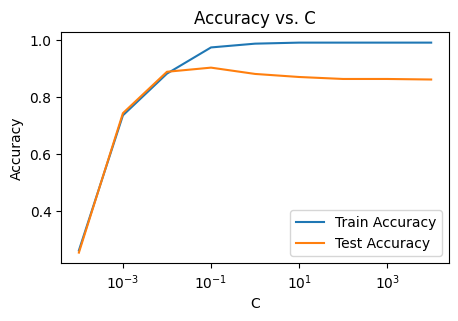

In [ ]:
#[코드 5-7] 최적의 벌점모수 모델링 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(param_grid, train_result, label='Train Accuracy')
plt.plot(param_grid, test_result, label='Test Accuracy')
plt.xscale('log')  # x 축을 로그 스케일로 설정
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C')
plt.legend()
plt.show()

In [ ]:
#[코드 5-8] 감성사전 결과 코드
lr = LogisticRegression(penalty = 'l1', C = 0.1, solver='liblinear')
lr.fit(X_train, Y_train)

column_names = X.columns
df1 = pd.DataFrame(column_names)
df1["value"] = lr.coef_[0]
df1.to_excel("coef_result.xlsx")

In [ ]:
#[코드 5-9] 모델링 저장 코드
import joblib

joblib.dump(quantify, 'transaction_encoder.pkl')
joblib.dump(scaler, 'StandardScaler.pkl')
joblib.dump(lr, 'Sentiment_Analysis.pkl')

['Sentiment_Analysis.pkl']

#감성분석을 이용한 텍스트분류


In [ ]:
#[코드 5-10] 적용데이터 불러오기 및 텍스트 전처리 코드
import joblib
import pandas as pd
from konlpy.tag import Okt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder


data = pd.read_excel("apply_data.xlsx")
contents = data["REVIEW"]

t = Okt()
pos = lambda d: ['/'.join(p[:-1]) for p in t.pos(d, stem=True, norm=True) if ((p[1]=='Noun') |(p[1]=='Verb')|(p[1]=='Adjetive') )]
new_texts_ko = []
for doc in contents:
  a = pos(doc)
  new_texts_ko.append(a)

print(new_texts_ko)

[['뛰다', '기록', '저장', '돼다', '살짝', '화나다', '러닝', '레벨', '친구', '뛰다', '거리', '확인', '하다', '기능', '일', '달리기', '저장', '잠그다', '제한', '상태', '해보다', '자다', '되다', '것', '로그인', '하다', '아무', '정보', '뜨다', '자동', '로그아웃', '되다', '현상'], ['자다', '사용', '하다', '요새', '만', '되다', '동작', '러닝', '기록', '못', '달리다', '먹다', '흠칫', '놀라다', '보다', '기록', '나아지다', '바라다'], ['전', '앱', '사용', '하다', '유저', '요', '엊', '그저께', '부터', '러닝', '하다', '앱', '혼자', '멈추다', '상황', '설명', '하다', '앱', '키', '평소', '러닝', '하다', '마다', '음성', '안내', '나오다', '하다', '나오다', '폰', '화면', '보다', '러닝', '시간', '거리', '화면', '멈추다', '자다', '작동', '하다', '갑자기', '혼자', '멈', '앱', '끄다', '다시', '켜다', '앱', '멈추다', '나서다', '내', '위치', '찾다', '하다', '지도', '보다', '실제', '거리', '표시', '건물', '뚫다', '일직선', '것', '표시', '되어다', '앱', '끄다', '다시', '켜', '보고', '러닝', '기록', '삭제', '하다', '다시', '해보다', '앱', '지우다', '다시', '깔다', '보다', '나이키', '러닝', '클럽', '앱', '제', '이동', '동선', '거리', '시간', '등', '기록', '해주다', '앱', '러닝', '하다', '때', '처음', '두번째', '앱', '사용', '상황', '러닝', '기록', '화가', '나다', '앱', '오류', '날때', '기분', '운동', '하다', '나오다', '기분', '나빠지다', '

In [ ]:
#[코드 5-11] 텍스트 정형화 코드
import joblib

loaded_quantify = joblib.load('transaction_encoder.pkl')
filtered_new_texts_ko = [[item for item in transaction if item in loaded_quantify.columns_] for transaction in new_texts_ko]
new_te_ary = loaded_quantify.transform(filtered_new_texts_ko)
new_te_ary_int = new_te_ary.astype(int)
new_df = pd.DataFrame(new_te_ary_int, columns=loaded_quantify.columns_)
new_df

,가게,가관,가기,가까이,가끔,가나,가능,가다,가다가,가도,...,흘러가다,흘리다,흠,흡연,흥,흥미,히,힘,힘내다,힘빠지다
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#[코드 5-12] 모델링 적용 및 저장 코드
scaler = joblib.load('StandardScaler.pkl')
loaded_model = joblib.load('Sentiment_Analysis.pkl')
X_scaled = scaler.transform(new_df)
predictions = loaded_model.predict(X_scaled)
probabilities = loaded_model.predict_proba(X_scaled)

apply_result = pd.DataFrame(probabilities)
apply_result["분류"] = predictions
apply_result["텍스트"] = data["REVIEW"]
apply_result.to_excel("apply_result.xlsx")
apply_result

,0,1,분류,텍스트
0,0.998722,0.001278,0,23.3.22. 열심히 뛰었는데 기록 저장 안돼서 살짝 화나네요 ----- 러닝 레...
1,0.048940,0.951060,1,잘 사용하다가 요새 0.2km만 되면 동작이 안되서 러닝기록도 못하고 있습니다. 달...
2,0.999940,0.000060,0,1~2년 전부터 앱을 사용하는 유저인데요 엊그저께 (22년도 8월2일)부터 러닝을 ...
3,0.650385,0.349615,0,"스타일리쉬한 디자인, 심플하고 직관적인 기능. 현존하는 가장 힙한 러닝앱이라고 생각..."
4,0.997379,0.002621,0,"깔끔하고, 예뻐서 정말 좋습니다. 러닝 완료하고, 로딩하는데 시간이 좀 걸립니다."
...,...,...,...,...
1560,0.983078,0.016922,0,페이스북 연동하는데 요구하는 정보는 많은데다 계속 가입도 되지않고 뭐 쓰라고 만든건가
1561,0.013193,0.986807,1,단위 어떻게 바꾸나요ㅜㅜ 마일 말고 킬로미터!!
1562,0.048292,0.951708,1,너무좋습니다
1563,0.114888,0.885112,1,처음 사용했는데 리뷰를 남기라니까...첫날 사용해본결과 좋아요


In [ ]:
positive = apply_result[1]
negative = apply_result[0]

positive_score = round(positive.mean()*100,1)
negative_score = round(negative.mean()*100,1)

print ("이 어플리케이션의 긍정 점수는 "+ str(positive_score) +"점입니다")
print ("이 어플리케이션의 부정 점수는 "+ str(negative_score) +"점입니다")

이 어플리케이션의 긍정 점수는 66.9점입니다
이 어플리케이션의 부정 점수는 33.1점입니다
